## Importing Libraries

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
import sqlite3
import os
warnings.filterwarnings('ignore')

## Dataset from Kaggle & Database Connection

In [ ]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("datalearn/airlines-db")

print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'airlines-db' dataset.
Dataset downloaded to: /kaggle/input/airlines-db


In [ ]:
# Check what files were downloaded
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['airlines_db.sqlite']


In [ ]:
# Find the SQLite database file automatically
db_file = None
for file in files:
    if file.endswith(".sqlite") or file.endswith(".db"):
        db_file = os.path.join(path, file)
        break

if db_file is None:
    raise FileNotFoundError("No SQLite database file found in dataset.")

print("Database file found:", db_file)


Database file found: /kaggle/input/airlines-db/airlines_db.sqlite


In [ ]:
# Connect to the SQLite database
connection = sqlite3.connect(db_file)
cursor = connection.cursor()

print("Connected successfully!")

Connected successfully!


In [ ]:
# List tables in the database
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


## Exploratory Data Analysis

In [ ]:
aircrafts_data = pd.read_sql_query("SELECT * FROM aircrafts_data", connection)

aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [ ]:
airports_data = pd.read_sql_query("SELECT * FROM airports_data", connection)

airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [ ]:
boarding_passes =  pd.read_sql_query("""SELECT * FROM boarding_passes""",connection)

boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [ ]:
bookings  =  pd.read_sql_query("""SELECT * FROM bookings""", connection)

bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [ ]:
flights =  pd.read_sql_query("""SELECT * FROM flights""",connection)

flights


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [ ]:
seats  =  pd.read_sql_query("""SELECT * FROM seats""",connection)

seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [ ]:
ticket_flights  =  pd.read_sql_query("""SELECT * FROM ticket_flights""",connection)

ticket_flights.head()


,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [ ]:
tickets  =  pd.read_sql_query("""SELECT * FROM tickets""",connection)

tickets.head()


,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [ ]:
# Get all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]

tables

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [ ]:
# Loop through tables and get column info
for table in tables:
    print(f"\n Table: {table}")
    print("-" * 40)

    cursor.execute(f"PRAGMA table_info({table});")
    columns = cursor.fetchall()

    # Convert to DataFrame for better readability
    df = pd.DataFrame(columns, columns=[
        "cid",        # Column ID
        "name",       # Column name
        "type",       # Data type
        "notnull",    # NOT NULL constraint
        "default",    # Default value
        "pk"          # Primary Key (1 = Yes)
    ])

    print(df)


 Table: aircrafts_data
----------------------------------------
   cid           name          type  notnull default  pk
0    0  aircraft_code  character(3)        1    None   0
1    1          model         jsonb        1    None   0
2    2          range       INTEGER        1    None   0

 Table: airports_data
----------------------------------------
   cid          name          type  notnull default  pk
0    0  airport_code  character(3)        1    None   0
1    1  airport_name         jsonb        1    None   0
2    2          city         jsonb        1    None   0
3    3   coordinates         point        1    None   0
4    4      timezone          TEXT        1    None   0

 Table: boarding_passes
----------------------------------------
   cid         name                  type  notnull default  pk
0    0    ticket_no         character(13)        1    None   0
1    1    flight_id               INTEGER        1    None   0
2    2  boarding_no               INTEGER        1  

In [ ]:
for table in tables:
    print('\ntable: ', table)
    query = f"select * from {table}"
    df_table = pd.read_sql_query(query, connection)
    print(df_table.isnull().sum())


table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


## Basic Analysis

### How many planes have more than 100 seats?

In [ ]:
query = f"select aircraft_code, count(*) as num_seats from seats group by aircraft_code having num_seats > 100"
df1 = pd.read_sql_query(query, connection)

df1

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


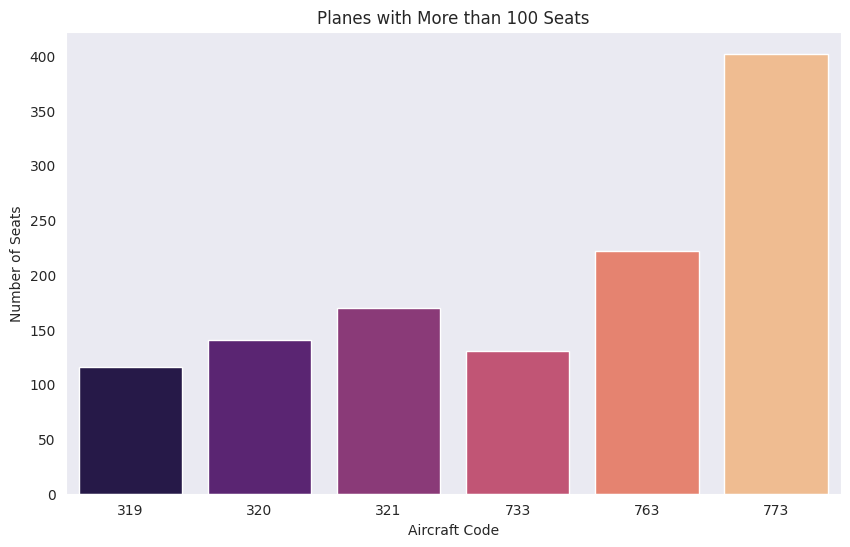

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(10, 6))
sns.barplot(x='aircraft_code', y='num_seats', data=df1, palette='magma')
plt.xlabel('Aircraft Code')
plt.ylabel('Number of Seats')
plt.title('Planes with More than 100 Seats')
plt.show()

#### The Boeing 773 has the highest seating capacity (~402 seats), making it suitable for high-demand routes. In contrast, aircraft such as 319 and 733 have lower seating capacity and are more suitable for short-haul or lower-demand routes. Capacity directly influences revenue potential, assuming stable occupancy and pricing.

### How the number of tickets booked and total amount earned changed with the time

In [ ]:
df_tickets = pd.read_sql_query("""select * from tickets inner join bookings
                on tickets.book_ref = bookings.book_ref""", connection)
df_tickets['book_date'] = pd.to_datetime(df_tickets['book_date'])

df_tickets['date'] = df_tickets['book_date'].dt.date

df_ticket_count = df_tickets.groupby('date').size().reset_index(name='count') # this will reset size value column name as count

df_ticket_count

,date,count
0,2017-06-21,6
1,2017-06-22,12
2,2017-06-23,28
3,2017-06-24,106
4,2017-06-25,266
5,2017-06-26,499
6,2017-06-27,1028
7,2017-06-28,1678
8,2017-06-29,2765
9,2017-06-30,3772


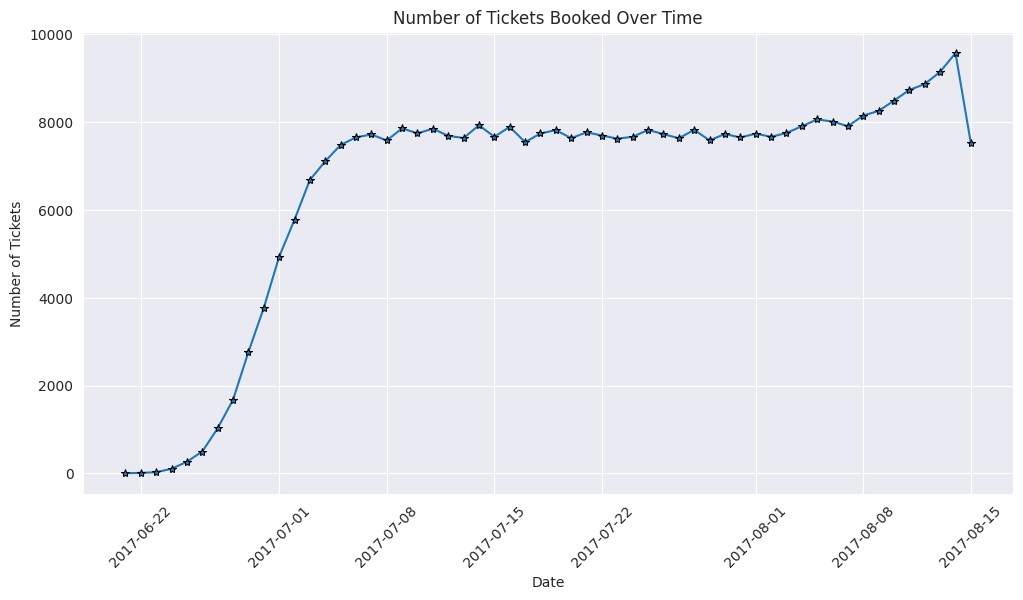

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='count', data=df_ticket_count, marker='*', markeredgecolor = 'black')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets Booked Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_bookings = pd.read_sql_query("""select * from bookings""", connection)
df_bookings['book_date'] = pd.to_datetime(df_bookings['book_date'])

df_bookings['date'] = df_bookings['book_date'].dt.date

df_booking_amount = df_bookings.groupby('date')[['total_amount']].sum()

df_booking_amount

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


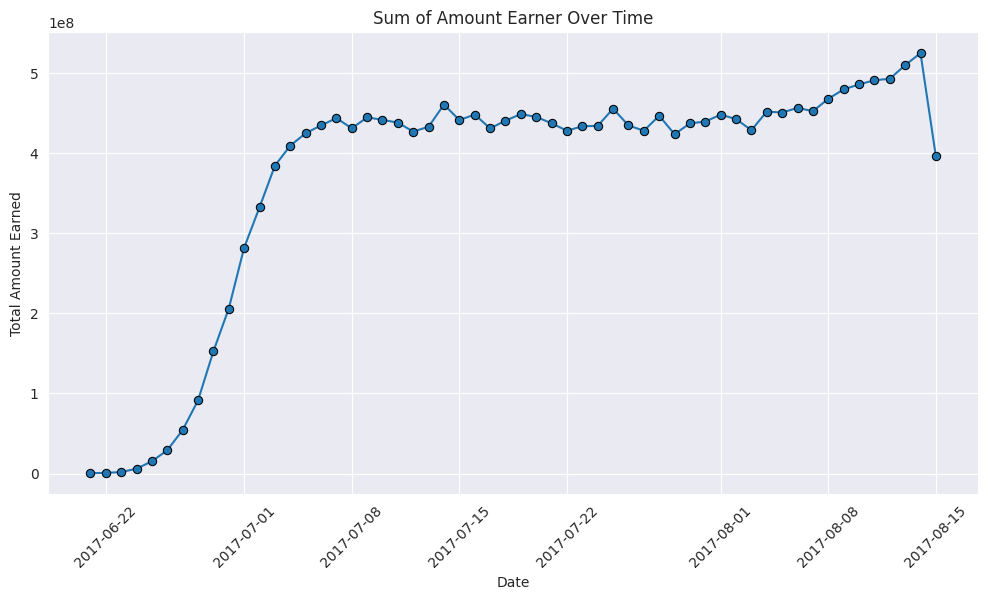

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_amount', data=df_booking_amount, marker='o', markeredgecolor = 'black')
plt.xlabel('Date')
plt.ylabel('Total Amount Earned')
plt.title('Sum of Amount Earner Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### The strong correlation between ticket volume and revenue indicates stable ticket pricing. Revenue growth is primarily volume-driven. The July plateau suggests operational capacity constraints, while the August rise reflects increasing demand, possibly seasonal.

### Calculate the average charges for each aircraft with different fare conditions?

In [ ]:
df_aircraft_average_charge = pd.read_sql_query(" select fare_conditions, aircraft_code, avg(amount) from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code, fare_conditions", connection)
df_aircraft_average_charge

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.55770292656
1,Economy,319,38311.40234713914
2,Business,321,34435.66266431457
3,Economy,321,11534.97476439323
4,Business,733,41865.626175253856
5,Economy,733,13985.152
6,Business,763,82839.84286649604
7,Economy,763,27594.7218286053
8,Business,773,57779.90943535718
9,Comfort,773,32740.552888786075


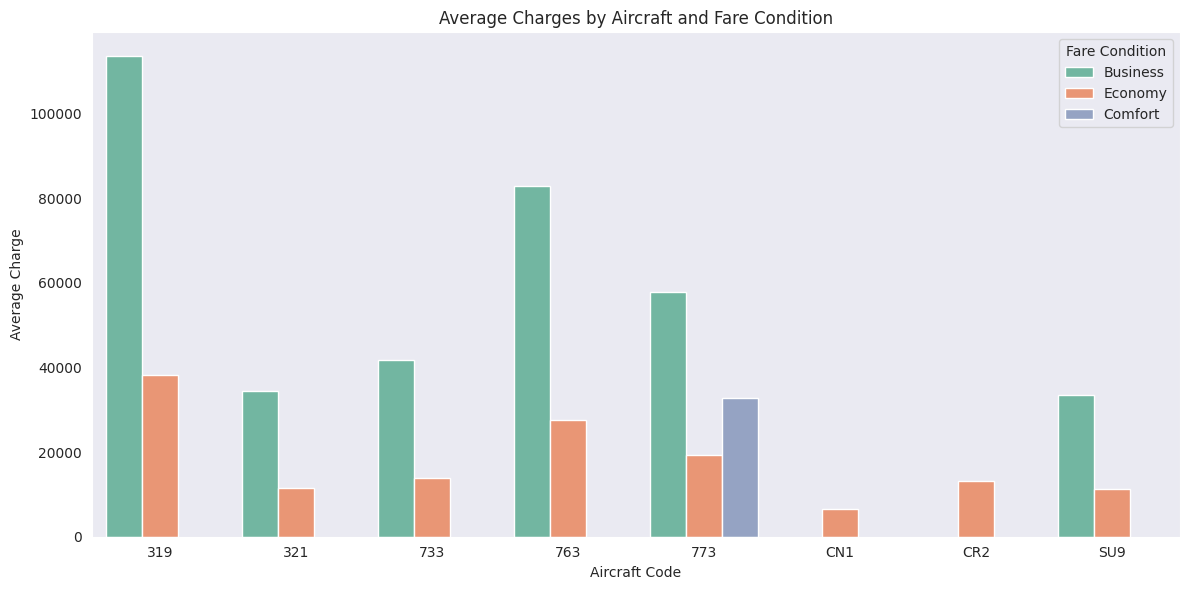

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='aircraft_code', y='avg(amount)', hue='fare_conditions', data=df_aircraft_average_charge, palette='Set2')
plt.xlabel('Aircraft Code')
plt.ylabel('Average Charge')
plt.title('Average Charges by Aircraft and Fare Condition')
plt.legend(title='Fare Condition')
plt.tight_layout()
plt.show()

#### Wide-body aircraft (319, 763, 773) generate higher average fares, especially in Business class, indicating premium route allocation. Regional aircraft (CN1, CR2) operate economy-only services with significantly lower yields, suggesting short-haul or low-demand market positioning.

## Analyzing Occupancy Rate

### For each aircraft, calculate the total revenue per year and average revenue per ticket

In [ ]:
df_aircraft = pd.read_sql_query("select * from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id", connection)
df_aircraft['year'] = pd.to_datetime(df_aircraft['scheduled_departure']).dt.year

df_aircraft_revenue = (
    df_aircraft
    .groupby(['aircraft_code', 'year'])['amount']
    .agg(total_revenue='sum', average_revenue='mean')
    .reset_index()
)

df_aircraft_revenue

,aircraft_code,year,total_revenue,average_revenue
0,319,2017,2706163100,51201.693375967305
1,321,2017,1638164100,15291.509301869708
2,733,2017,1426552100,16568.164502566724
3,763,2017,4371277100,35033.55747190921
4,773,2017,3431205500,23765.760929794425
5,CN1,2017,96373800,6568.552344601963
6,CR2,2017,1982760500,13207.66110230346
7,SU9,2017,5114484700,13985.541895225022


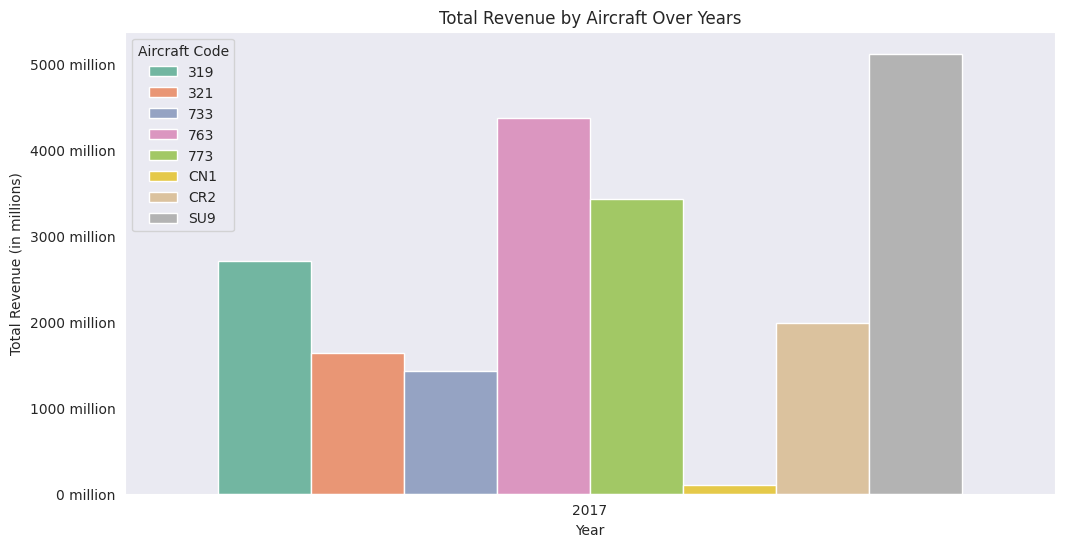

In [ ]:
plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=df_aircraft_revenue,
    x='year',
    y='total_revenue',
    hue='aircraft_code',
    palette='Set2'
)

# Format y-axis to thousands (K)
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'{int(x/1000000)} million')
)

plt.title("Total Revenue by Aircraft Over Years")
plt.xlabel("Year")
plt.ylabel("Total Revenue (in millions)")
plt.legend(title='Aircraft Code')
plt.show()

#### In 2017, SU9 generated the highest total revenue despite not being the largest aircraft by seating capacity. This indicates that route frequency and operational utilization play a more critical role in revenue generation than aircraft size alone. Wide-body aircraft (763, 773) also contributed significantly, likely driven by premium fare segments.

### Calculate the average occupancy per aircraft

In [ ]:
occupancy_rate_yearly = pd.read_sql_query("""
    SELECT
        f.aircraft_code,
        strftime('%Y', substr(f.scheduled_departure, 1, 19)) as year,
        AVG(seats_booked * 1.0 / total_seats) AS occupancy_rate
    FROM (
        SELECT
            flights.flight_id,
            flights.aircraft_code,
            flights.scheduled_departure,
            COUNT(boarding_passes.ticket_no) AS seats_booked
        FROM flights
        LEFT JOIN boarding_passes
            ON flights.flight_id = boarding_passes.flight_id
        GROUP BY flights.flight_id
    ) AS f
    JOIN (
        SELECT aircraft_code, COUNT(*) AS total_seats
        FROM seats
        GROUP BY aircraft_code
    ) AS s
    ON f.aircraft_code = s.aircraft_code
    GROUP BY f.aircraft_code, year
""", connection)

occupancy_rate_yearly['year'] = occupancy_rate_yearly['year'].astype(int)

occupancy_rate_yearly


,aircraft_code,year,occupancy_rate
0,319,2017,0.20393253736327968
1,321,2017,0.1739573288331726
2,733,2017,0.28832266634464426
3,763,2017,0.2547240114807686
4,773,2017,0.33491150803360253
5,CN1,2017,0.07306157662029548
6,CR2,2017,0.1854818744473912
7,SU9,2017,0.2444974348032705


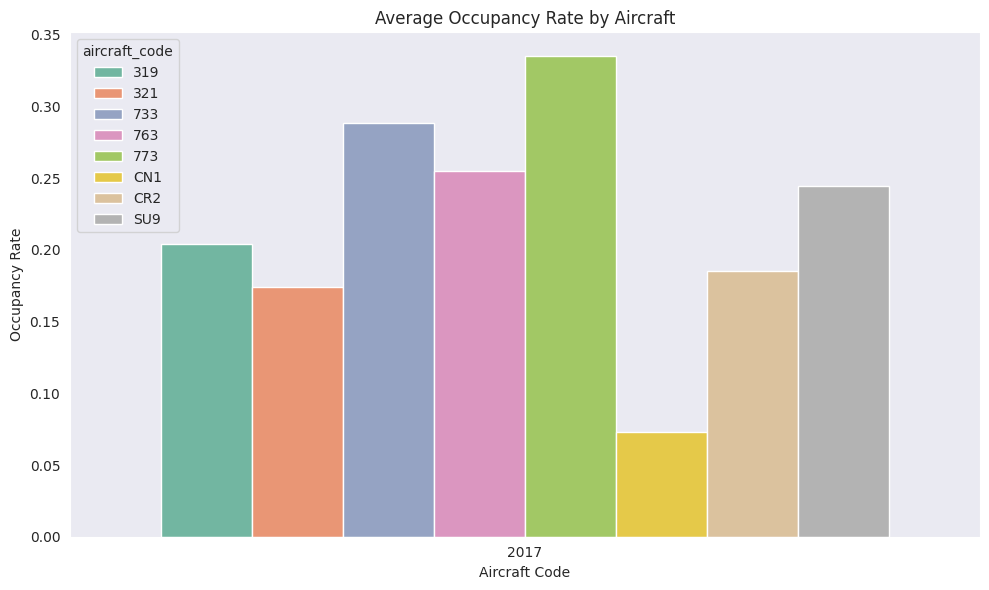

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=occupancy_rate_yearly,
    x='year',
    y='occupancy_rate',
    hue_order=occupancy_rate_yearly['aircraft_code'].unique(),
    hue='aircraft_code',
    palette='Set2'
)

plt.title("Average Occupancy Rate by Aircraft")
plt.ylabel("Occupancy Rate")
plt.xlabel("Aircraft Code")
plt.tight_layout()

plt.show()

#### Aircraft 773 demonstrates the highest load factor, indicating strong route demand and efficient capacity utilization. In contrast, CN1 shows significant underutilization. While SU9 generates the highest total revenue, its occupancy rate is moderate, suggesting that revenue performance is driven more by frequency and pricing than by load factor alone.

### Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [ ]:
pd.set_option("display.float_format", str) # this displays complete value instead of 1e9...1e9 means 1000000000

In [ ]:
df_merged = df_aircraft_revenue.merge(
    occupancy_rate_yearly,
    on=['aircraft_code', 'year']
)
df_merged

,aircraft_code,year,total_revenue,average_revenue,occupancy_rate
0,319,2017,2706163100,51201.693375967305,0.20393253736327968
1,321,2017,1638164100,15291.509301869708,0.1739573288331726
2,733,2017,1426552100,16568.164502566724,0.28832266634464426
3,763,2017,4371277100,35033.55747190921,0.2547240114807686
4,773,2017,3431205500,23765.760929794425,0.33491150803360253
5,CN1,2017,96373800,6568.552344601963,0.07306157662029548
6,CR2,2017,1982760500,13207.66110230346,0.1854818744473912
7,SU9,2017,5114484700,13985.541895225022,0.2444974348032705


In [ ]:
df_merged['new_occupancy_rate'] = df_merged['occupancy_rate'] * 1.10
df_merged['Inc Annual Turnover'] = df_merged['total_revenue'] * 0.10
df_merged['projected_revenue'] = df_merged['total_revenue'] * 1.10
df_merged

,aircraft_code,year,total_revenue,average_revenue,occupancy_rate,new_occupancy_rate,Inc Annual Turnover,projected_revenue
0,319,2017,2706163100,51201.693375967305,0.20393253736327968,0.22432579109960768,270616310.0,2976779410.0000005
1,321,2017,1638164100,15291.509301869708,0.1739573288331726,0.1913530617164899,163816410.0,1801980510.0000002
2,733,2017,1426552100,16568.164502566724,0.28832266634464426,0.31715493297910874,142655210.0,1569207310.0000002
3,763,2017,4371277100,35033.55747190921,0.2547240114807686,0.2801964126288455,437127710.0,4808404810.0
4,773,2017,3431205500,23765.760929794425,0.33491150803360253,0.3684026588369628,343120550.0,3774326050.0000005
5,CN1,2017,96373800,6568.552344601963,0.07306157662029548,0.08036773428232503,9637380.0,106011180.00000001
6,CR2,2017,1982760500,13207.66110230346,0.1854818744473912,0.20403006189213033,198276050.0,2181036550.0
7,SU9,2017,5114484700,13985.541895225022,0.2444974348032705,0.26894717828359754,511448470.0,5625933170.0


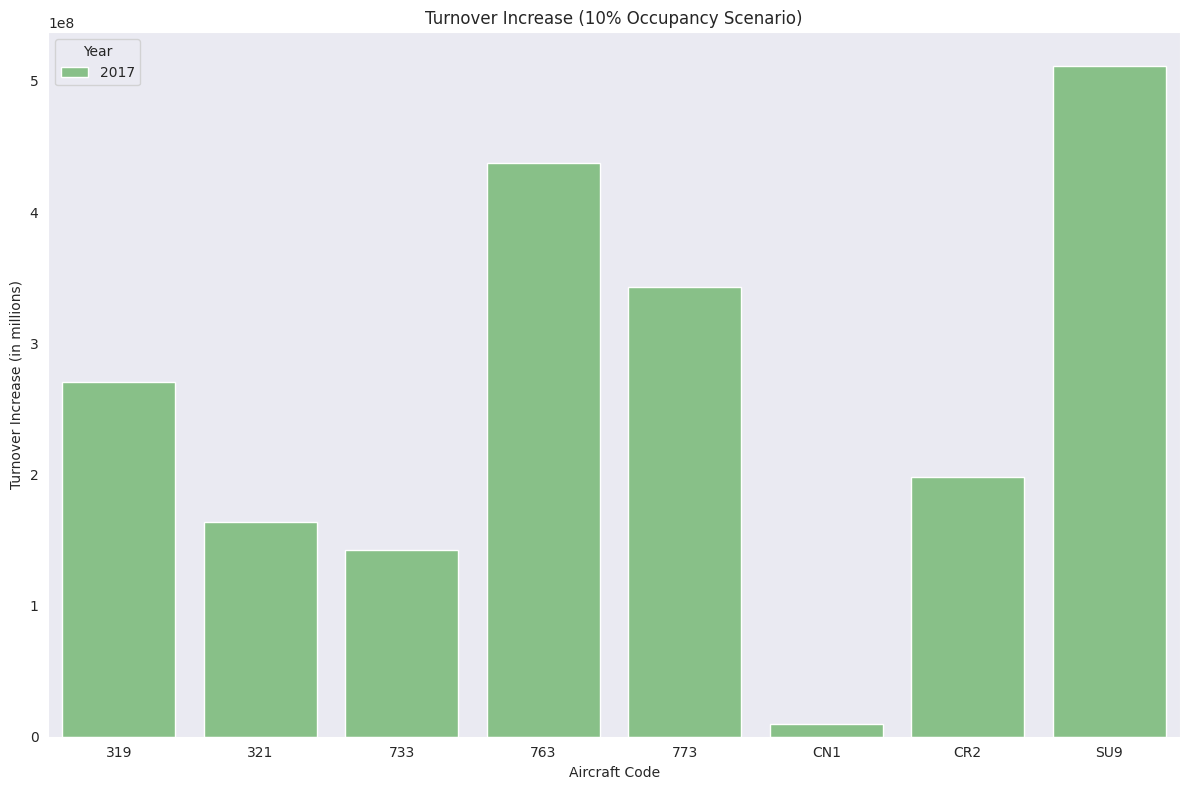

In [ ]:
plt.figure(figsize=(12,8))

sns.barplot(
    data=df_merged,
    x='aircraft_code',
    y='Inc Annual Turnover',
    hue='year',
    palette='Accent'
)

plt.title("Turnover Increase (10% Occupancy Scenario)")
plt.xlabel("Aircraft Code")
plt.ylabel("Turnover Increase (in millions)")
plt.legend(title='Year')
plt.tight_layout()
plt.show()


#### Under a 10% occupancy growth scenario, SU9 yields the highest incremental turnover (~510M), followed by aircraft 763 and 773. The revenue uplift is directly proportional to current revenue levels, indicating that growth strategies should prioritize high-performing aircraft to maximize financial impact.